In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
from scipy.stats import beta

# Update font sizes globally
matplotlib.rcParams.update({'font.size': 12, 'axes.labelsize': 12, 'axes.titlesize': 14})

In [2]:
def stats_to_params(M, V):
    # converts the mean and variance of beta distribution to its shape parameters a and b
    a = (M**2 * (1-M) - V * M) / V
    b = a * (1-M) / M
    return(a, b)

def plot_beta_pdf(a, b, ax):
    x = np.linspace(beta.ppf(0.01, a, b),
                    beta.ppf(0.99, a, b), 100)
    ax.plot(beta.pdf(x, a, b), x,
            'r-', lw=5, alpha=0.6)

## Differing belief priors

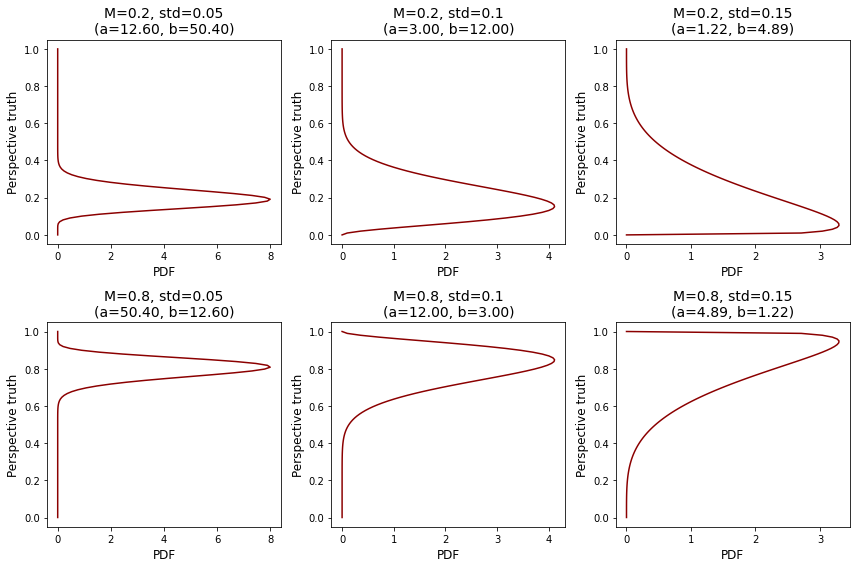

In [3]:
mean_values = [0.2, 0.8]
std_values = [0.05, 0.1, 0.15]

# Create subplots
fig, axs = plt.subplots(len(mean_values), len(std_values), figsize=(12, 8))
x = np.linspace(0, 1, 100)

for i, M in enumerate(mean_values):
    for j, std in enumerate(std_values):
        V = std**2  # Variance
        a, b = stats_to_params(M, V)
        
        # Compute the beta PDF
        y = beta.pdf(x, a, b)
        
        if len(mean_values) > 1 and len(std_values) > 1:
            ax = axs[i, j]
        elif len(mean_values) > 1:
            ax = axs[i]
        else:
            ax = axs[j]
        
        ax.plot(y, x, color="darkred")
        ax.set_title(f'M={M}, std={std}\n(a={a:.2f}, b={b:.2f})')
        ax.set_xlabel('PDF')
        ax.set_ylabel('Perspective truth')

plt.tight_layout()

# Save the figure
plt.savefig("plots/supplementary/content_truth_priors.jpg", dpi=300)
plt.show()


## Shared belief priors

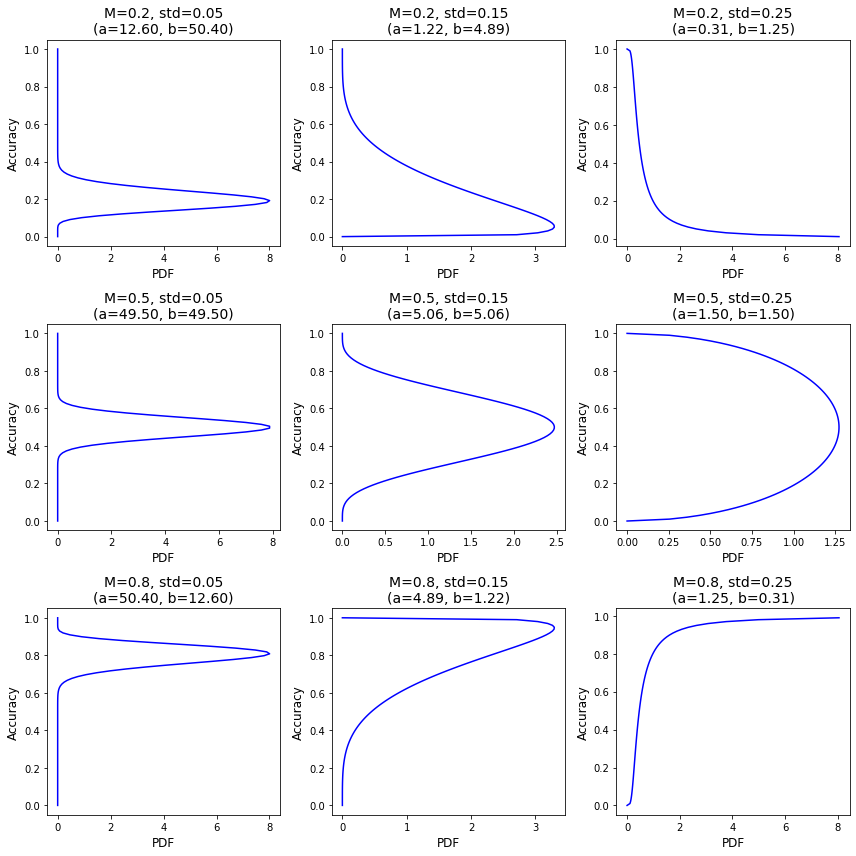

In [3]:
mean_values = [0.2, 0.5, 0.8]
std_values = [0.05, 0.15, 0.25]   # 0.3 (a=1, b=1)  0.07 (a=4, b=20)

# Create subplots
fig, axs = plt.subplots(len(mean_values), len(std_values), figsize=(12, 12))
x = np.linspace(0, 1, 100)

for i, M in enumerate(mean_values):
    for j, std in enumerate(std_values):
        V = std**2  # Variance
        a, b = stats_to_params(M, V)
        
        # Compute the beta PDF
        y = beta.pdf(x, a, b)
        
        if len(mean_values) > 1 and len(std_values) > 1:
            ax = axs[i, j]
        elif len(mean_values) > 1:
            ax = axs[i]
        else:
            ax = axs[j]
        
        ax.plot(y, x, color="blue")
        ax.set_title(f'M={M}, std={std}\n(a={a:.2f}, b={b:.2f})')
        ax.set_xlabel('PDF')
        ax.set_ylabel('Accuracy')

plt.tight_layout()

# Save the figure
plt.savefig("plots/supplementary/authority_accuracy_priors.jpg", dpi=300)
plt.show()

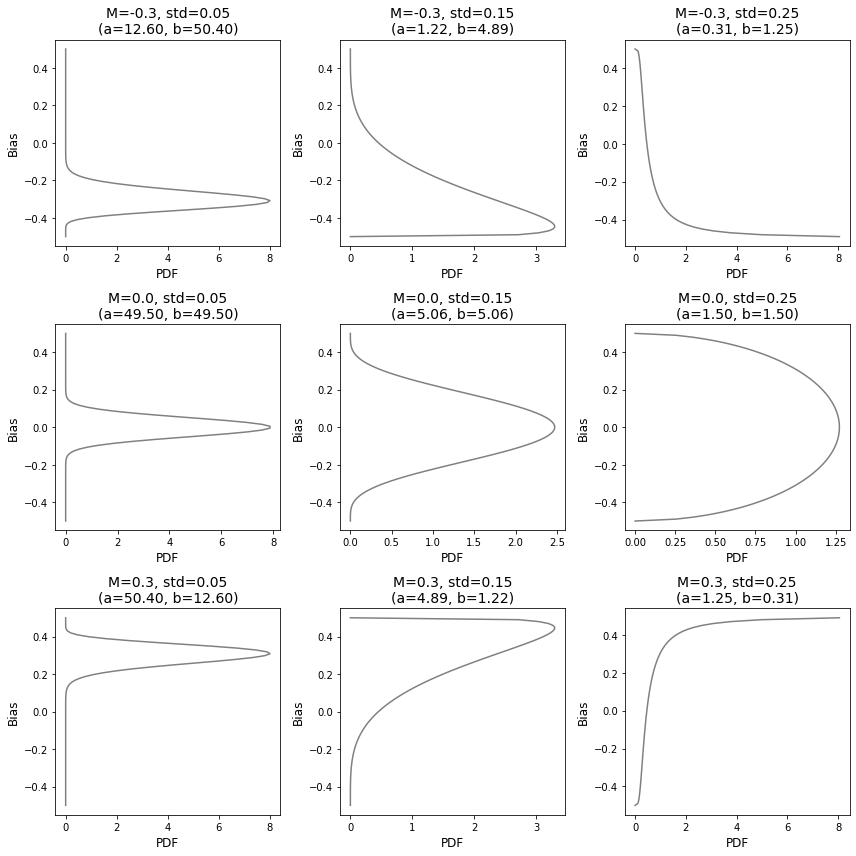

In [10]:
mean_values = [0.2, 0.5, 0.8]   # the mean will later be shifted by -0.5 to represent bias beliefs in [-0.5,0.5]
std_values = [0.05, 0.15, 0.25]   # 0.3 (a=1, b=1)  0.07 (a=4, b=20)

# Create subplots
fig, axs = plt.subplots(len(mean_values), len(std_values), figsize=(12, 12))
x = np.linspace(0, 1, 100)

for i, M in enumerate(mean_values):
    for j, std in enumerate(std_values):
        V = std**2  # Variance
        a, b = stats_to_params(M, V)
        
        # Compute the beta PDF
        y = beta.pdf(x, a, b)
        
        if len(mean_values) > 1 and len(std_values) > 1:
            ax = axs[i, j]
        elif len(mean_values) > 1:
            ax = axs[i]
        else:
            ax = axs[j]
        
        ax.plot(y, x - 0.5, color="grey")
        ax.set_title(f'M={M-0.5:.1f}, std={std}\n(a={a:.2f}, b={b:.2f})')
        ax.set_xlabel('PDF')
        ax.set_ylabel('Bias')

plt.tight_layout()

# Save the figure
plt.savefig("plots/supplementary/authority_bias_priors.jpg", dpi=300)
plt.show()